In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import STL

In [68]:
df = pd.read_csv('Data Limpia.csv')
df

,Date,Value
0,1991-07-01,3.52659
1,1991-08-01,3.18089
2,1991-09-01,3.25222
3,1991-10-01,3.61100
4,1991-11-01,3.56587
...,...,...
199,2008-01-01,21.65429
200,2008-03-01,18.26495
201,2008-04-01,23.10768
202,2008-05-01,22.91251


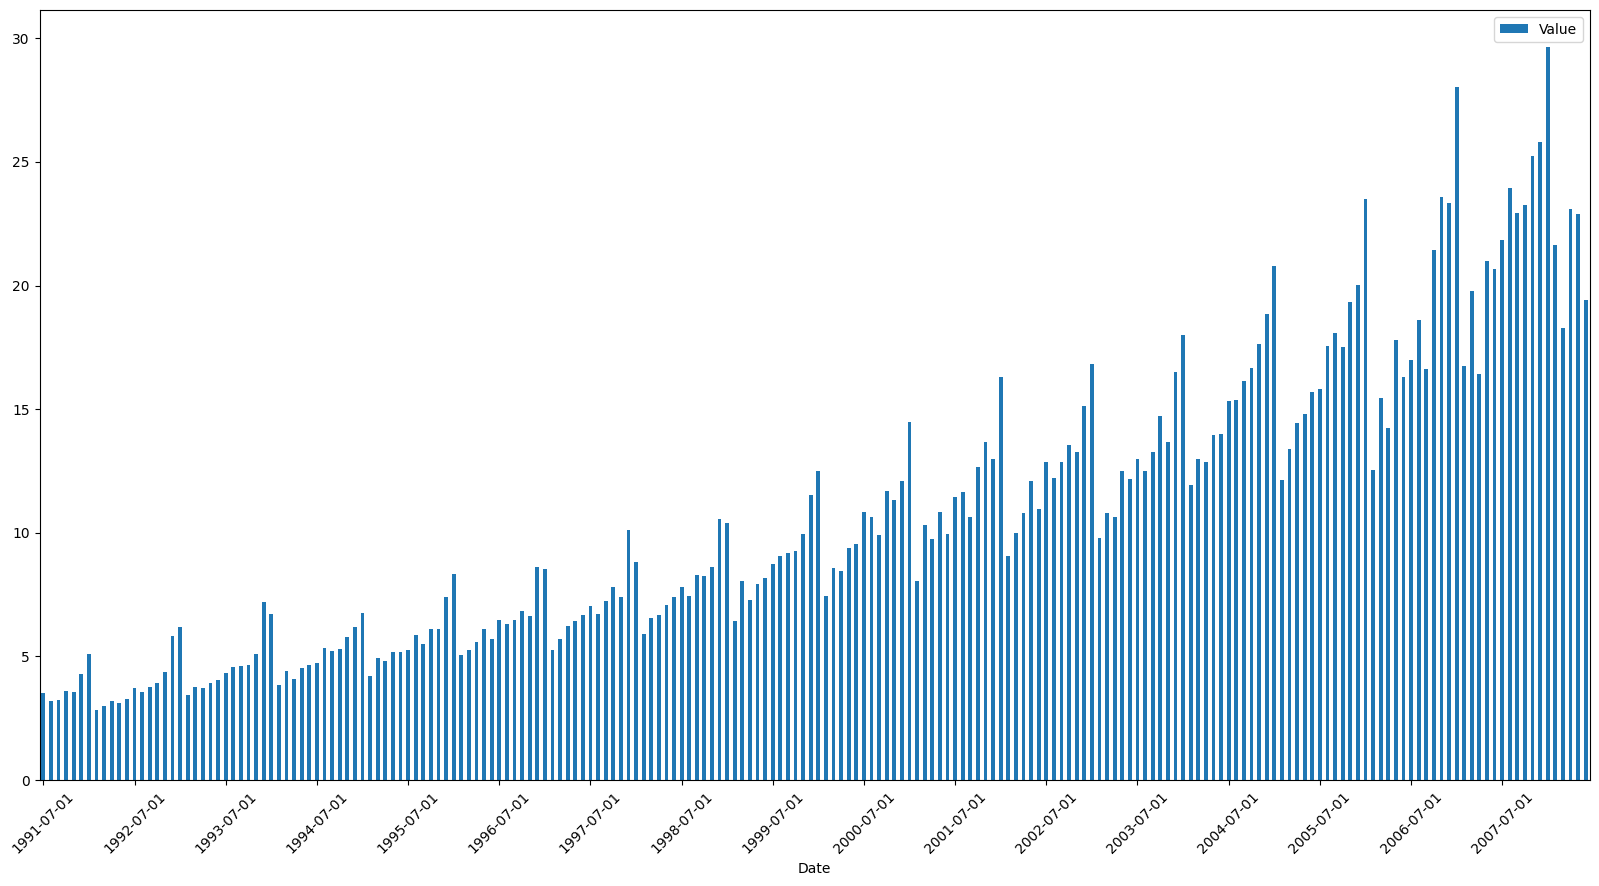

In [69]:
#Gráficamos la distribución de los datos con barras utilizando ambas columnas
df.plot.bar(x='Date', y='Value', rot=45, figsize=(20,10))
x_ticks = plt.gca().get_xticks()
plt.gca().set_xticks(x_ticks[::12])
plt.show()

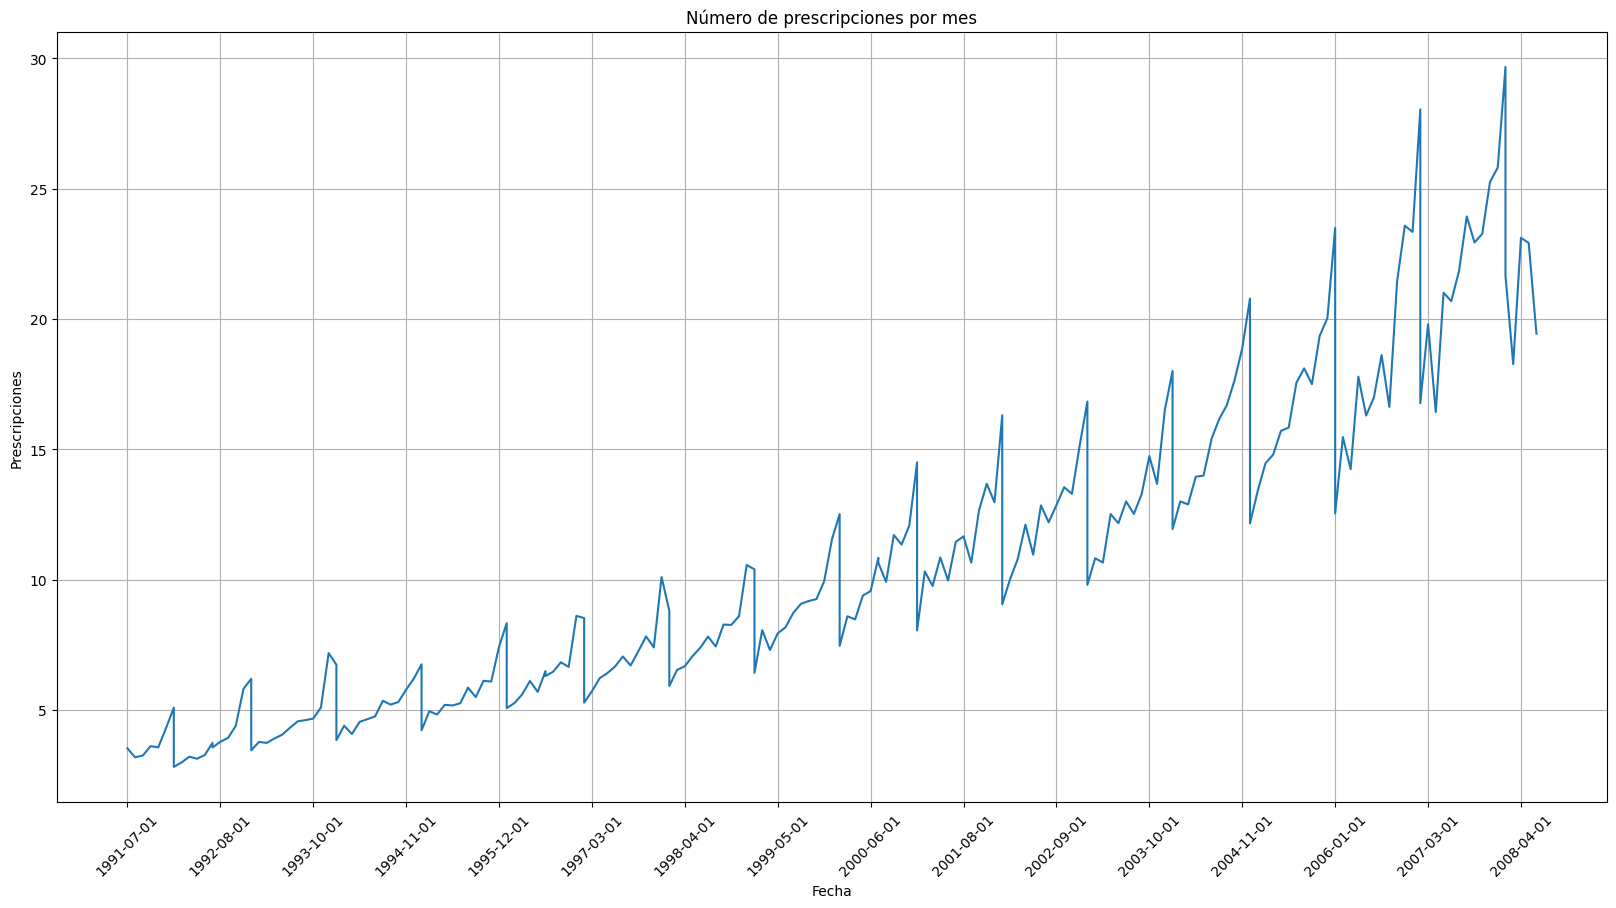

In [70]:
#Utilizamos otro gráfico ya que claramente vemos una tendencia pero no podemos ver los datos con claridad.
#utilizamos un subplot
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df['Date'], df['Value'])
ax.set(xlabel='Fecha', ylabel='Prescripciones', title='Número de prescripciones por mes')
ax.grid()
x_ticks = plt.gca().get_xticks()
plt.xticks(rotation=45)
plt.gca().set_xticks(x_ticks[::12])
plt.show()

Observamos que los datos tienen una tendencia estacional, que aumenta con los años. Esta es la principal razón para utilizar SARIMA por sobre ARIMA más adelante ya que el primero es el que toma en consideración la estacionalidad en las series de tiempo (después de todo, SARIMA se desglosa como Seasonal AutoRegressive Integrated Moving Average model).

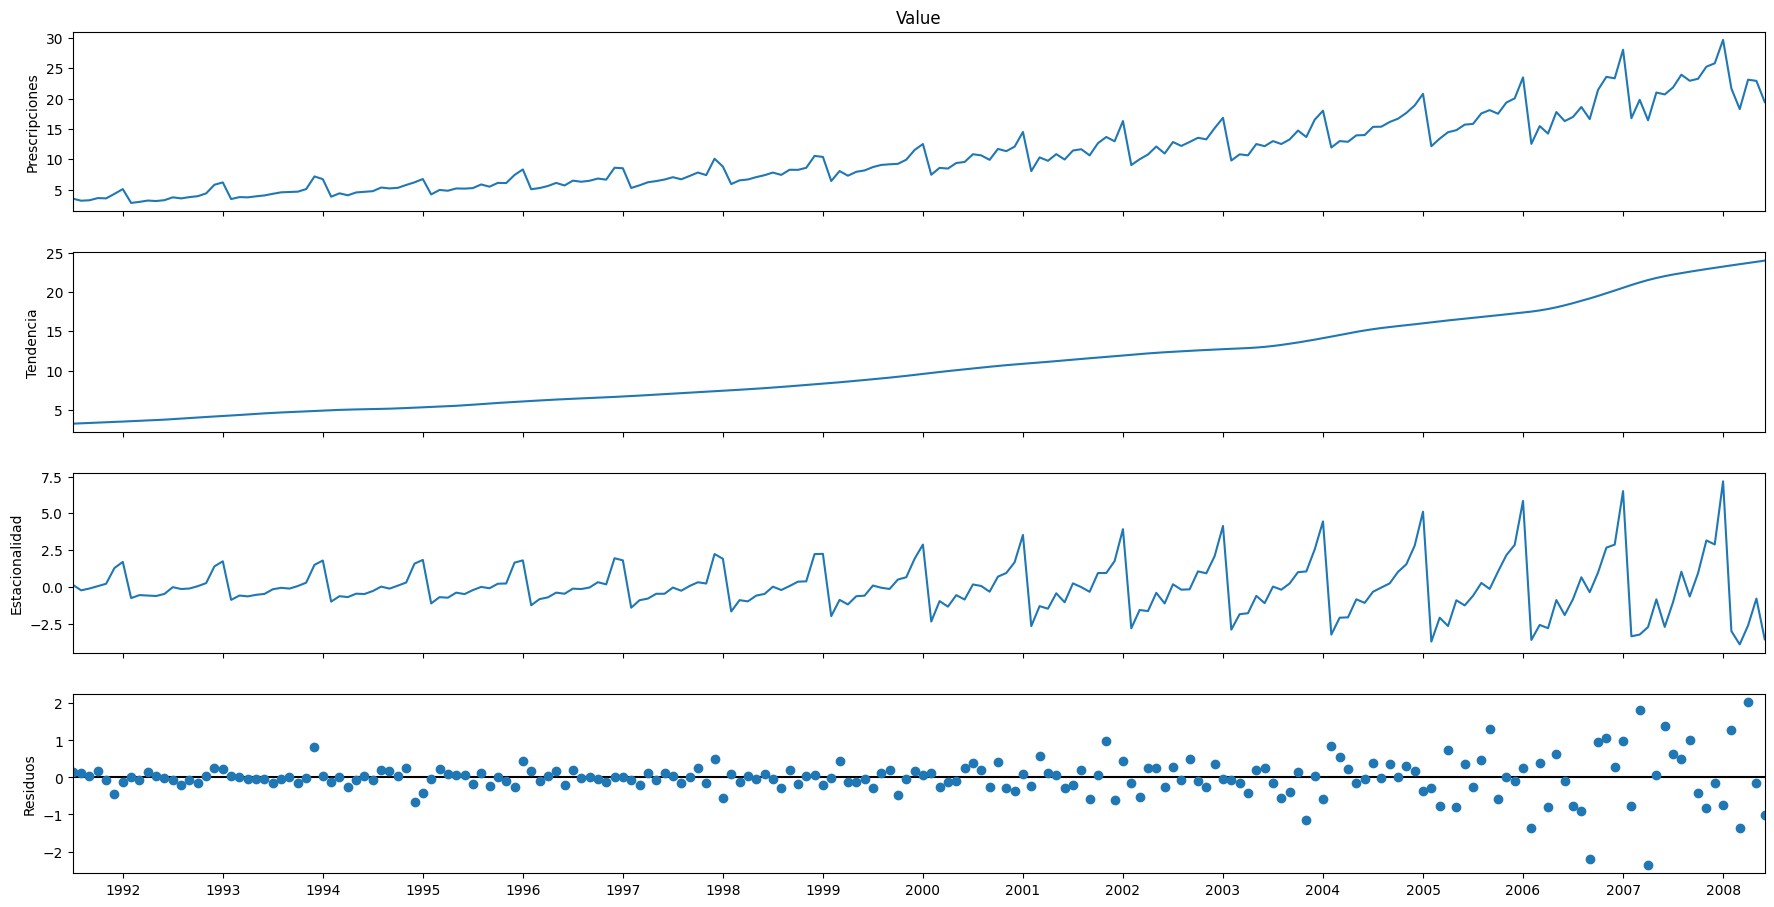

In [71]:
#Utilizaremos el paquete STL de statsmodels para observar las componentes de la serie de tiempo
stl = STL(df['Value'], period=12)   #periodo de 12 meses
res = stl.fit()
fig = res.plot()

#cambiamos los nombres de las leyendas de cada uno de los graficos
fig.axes[0].set_ylabel('Prescripciones')
fig.axes[1].set_ylabel('Tendencia')
fig.axes[2].set_ylabel('Estacionalidad')
fig.axes[3].set_ylabel('Residuos')
#tamaño de la figura
fig.set_figwidth(20)
fig.set_figheight(10)

#Configurar el eje X con fechas solo por años dentro de la columna Date
plt.xticks(np.arange(6, 203, 12), np.arange(1992, 2009, 1))

plt.show()

De lo anterior podemos observar 3 tipos de gráficas:
- La tendencia nos muestra el aumento gradual a lo largo de los años de cantidad de prescripciones.
- La estacionalidad nos muestra patrones repetitivos en los datos a lo largo de un año entre 1991 y 2008.
- Finalmente, el Residuo nos muestra lo errático que se va volviendo el pronóstico, el residuo nos indica la diferencia entre los valores reales y pronosticados a través de la tendencia y la estacionalidad.